# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
crypto_assets={ 'crypto':[my_btc,my_eth]}
#set tickers
variables = ['BTC','ETH']

#create crypto DataFrame with 'tickers' as index
df_assets = pd.DataFrame(crypto_assets, index=variables)

#Display crypto assets 
df_assets
#btc_assets = {'my_btc':[1.2]}
#eth_assets = {'my_eth':[5.3]}


,crypto
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data
#parse json and extract canadian price of BTC
btc_price = btc_response_data['data']['1']['quotes']['CAD']['price']
#print(json.dumps(eth_response_data,indent=4))
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
my_btc_value = btc_price*df_assets.loc['BTC']['crypto']
my_eth_value = eth_price * df_assets.loc['ETH']['crypto']
# Print current crypto wallet balance
print(f"The current value of your {df_assets.loc['BTC']} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {df_assets.loc['ETH']} ETH is ${my_eth_value:0.2f}")

The current value of your crypto    1.2
Name: BTC, dtype: float64 BTC is $30960.07
The current value of your crypto    5.3
Name: ETH, dtype: float64 ETH is $9510.67


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50
shares_data= {'shares':[my_agg , my_spy]}
# Set the tickers
tickers = ['AGG', 'SPY']
# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data,tickers )
df_shares

,shares
AGG,200
SPY,50


In [7]:
#Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPCA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

#creat the Alpaca API object
alpaca = tradeapi.REST( 
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



In [8]:
# Format current date as ISO format
today = pd.Timestamp('2020-07-14', tz='America/New_York').isoformat()



# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current price data for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio=pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio



AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-07-14 04:00:00+00:00  118.58  118.74  118.58  118.67  3986756   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-07-14 04:00:00+00:00       14580  118.667216  313.25  319.76  312.0   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-07-14 04:00:00+00:00  318.92  93545651      580270  316.244144

In [9]:
# Get current closing prices for SPY and AGG
spy_price = float(df_portfolio['SPY']['close'])
agg_price = float(df_portfolio['AGG']['close'])


In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE
spy_close_price = spy_price
agg_close_price = agg_price
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.92


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price*df_shares.loc['SPY']['shares']
my_agg_value = agg_close_price*df_shares.loc['AGG']['shares']
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15946.00
The current value of your 200 AGG shares is $23734.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_value = round(my_btc_value+my_eth_value)
total_shares_value = round(my_spy_value+my_agg_value)

total_value = {
    'amount' : [total_crypto_value,total_shares_value]}
rows = ['crypto','shares']
df_savings = pd.DataFrame(total_value, index=rows)

# Display savings DataFrame
display(df_savings)

,amount
crypto,40471
shares,39680


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

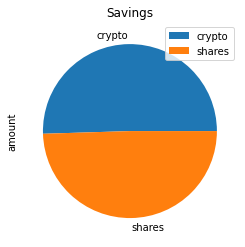

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title = 'Savings')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (total_crypto_value+total_shares_value)

# Validate saving health
if total_savings >= emergency_fund:
    print(f'Congratulations! You have saved enough money')
if total_savings < emergency_fund:
    print(f'you require to save additional ( emergency_fund - total_savings) to reach your goal')
    

Congratulations! You have saved enough money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

api = tradeapi.REST( 
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_stock_data.head()




,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [17]:
# Reorganize the DataFrame
# Separate ticker data
AGG=df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY=df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [45]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [46]:

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\makhl\OneDrive\Documents\GitHub\UTOR-VIRT-FIN-PT-08-2022-U-LOLC\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000510,0.998730,1.009796,1.003799,1.011283,0.998957,0.996439,0.992742,1.013012,1.005577,...,0.993171,1.004282,1.008905,0.999096,0.993579,0.996089,1.000725,1.002313,0.993563,1.004585
2,1.018246,0.998219,1.004987,1.007893,1.017114,1.007124,0.993334,0.989088,0.993956,1.008439,...,0.993697,0.998256,1.024031,1.006901,0.984229,0.995142,1.022213,1.000561,0.999597,1.016362
3,1.019136,0.998837,1.001793,1.011246,1.010941,1.001675,0.988452,0.987415,1.006601,1.019612,...,0.995571,0.997608,1.016277,1.008356,0.980794,0.999043,1.033767,1.001665,0.994897,1.011292
4,1.032261,1.005425,0.992458,1.003458,1.017478,1.010499,0.986875,0.988013,1.016042,1.017015,...,0.995679,0.994086,1.021995,1.003905,0.980404,1.013044,1.022550,1.004683,0.991817,1.006553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.423818,52.880369,24.097740,21.977435,17.829397,17.358065,14.052919,88.154858,26.514512,11.837065,...,103.452372,45.236313,6.063977,7.750335,17.227148,23.903311,17.020963,20.196092,8.797743,7.789618
7557,9.442315,52.783850,24.043045,21.954700,17.754156,17.565078,13.908448,88.300077,26.222894,11.762548,...,102.520092,45.313051,6.060812,7.660949,17.159714,23.896207,17.122770,20.175013,8.862541,7.847050
7558,9.459256,52.512960,24.250006,21.913272,17.698211,17.539316,14.040187,87.370647,26.395892,11.751739,...,103.541666,45.198540,6.011622,7.631878,16.816600,23.894454,17.025904,20.358185,8.945586,7.846192
7559,9.575815,52.295828,24.262619,22.097392,17.727992,17.473528,14.039872,87.645443,26.344429,11.813796,...,104.806207,45.558937,6.046171,7.563302,16.883991,23.681024,17.303516,20.347480,8.980281,7.897658


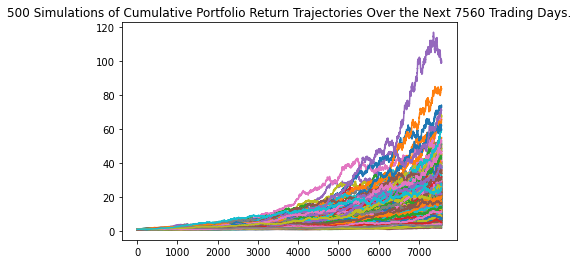

In [27]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

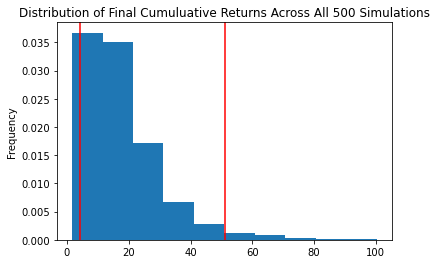

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.046579
std              12.766431
min               1.659062
25%               9.466319
50%              14.463082
75%              22.869330
max             100.267398
95% CI Lower      4.158802
95% CI Upper     51.241320
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*20000, 2)
ci_upper=round(tbl[9]*20000, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83176.04 and $1024826.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = round(20000 * 1.5)
initial_investment

30000

In [34]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000, 2)
ci_upper = round(tbl[9]*30000, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $124764.06 and $1537239.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\makhl\OneDrive\Documents\GitHub\UTOR-VIRT-FIN-PT-08-2022-U-LOLC\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991267,0.996453,0.999508,1.000678,0.998735,0.991524,0.997121,0.993076,1.004986,1.014170,...,1.013877,1.008547,0.988398,0.989710,1.012083,1.007673,0.990195,0.999260,0.985919,1.006072
2,0.994209,0.991399,1.001545,0.990936,0.985626,0.999415,1.007985,0.994086,1.016653,1.005995,...,1.006899,1.004520,0.989993,0.997985,1.014484,0.997834,0.998019,0.992289,0.980828,1.014027
3,0.983054,0.985725,0.989510,0.992131,0.997592,1.000963,1.009835,1.000922,1.023640,1.001614,...,1.009376,0.999602,0.988385,0.986891,1.006480,1.000329,0.987172,0.997465,0.983549,1.026668
4,0.989898,0.974808,0.986456,0.997356,0.992079,1.014179,1.003736,0.977417,1.032320,1.001718,...,1.006826,0.997407,0.977921,0.976532,1.009866,1.010018,0.986429,0.996403,0.987249,1.040541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.060101,2.223390,1.391833,1.539542,1.121411,1.076512,2.454298,1.550451,1.522997,0.936388,...,1.203199,1.344164,1.264843,1.817752,1.127421,1.628878,1.638506,1.264987,1.531564,1.755909
1257,2.029862,2.208087,1.383074,1.559742,1.134573,1.087544,2.449005,1.538496,1.534768,0.917398,...,1.204763,1.348078,1.258208,1.824557,1.128031,1.612195,1.652251,1.279316,1.523699,1.747675
1258,2.021066,2.192654,1.383343,1.552530,1.116704,1.086565,2.431973,1.535938,1.538651,0.930457,...,1.201527,1.352135,1.259199,1.801371,1.136685,1.597535,1.659308,1.288791,1.522372,1.764710
1259,2.001292,2.177239,1.372428,1.560480,1.117379,1.097480,2.416259,1.530748,1.549953,0.931553,...,1.206839,1.350455,1.260755,1.796862,1.116577,1.616375,1.664002,1.296578,1.535667,1.768212


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

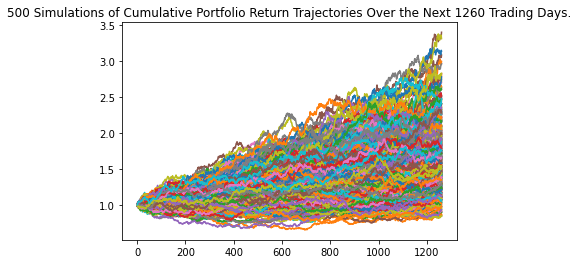

In [42]:
# Plot simulation outcomes
MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

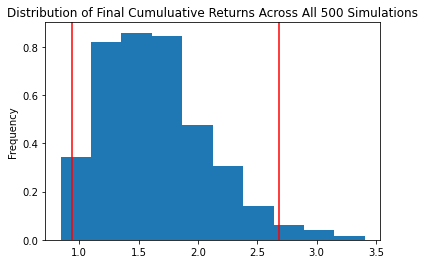

In [43]:
# Plot probability distribution and confidence intervals
MC_fiveyear.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              1.639895
std               0.452552
min               0.843511
25%               1.293931
50%               1.583380
75%               1.892170
max               3.405640
95% CI Lower      0.936159
95% CI Upper      2.678568
Name: 1260, dtype: float64


In [50]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000, 2)
ci_upper_five = round(tbl[9]*60000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56169.51 and $160714.09


### Ten Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [53]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\makhl\OneDrive\Documents\GitHub\UTOR-VIRT-FIN-PT-08-2022-U-LOLC\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000722,0.999453,1.004411,0.997661,0.999266,0.995994,1.003190,0.980745,0.996386,1.011011,...,1.004942,0.993097,1.002652,0.992677,1.002641,1.009246,0.990482,0.990921,0.995435,1.005592
2,1.010131,0.997500,1.008280,0.988720,0.996999,1.002393,1.003376,0.985234,0.994652,1.016589,...,1.016384,0.995570,0.996377,0.985091,1.018671,1.006536,0.997817,0.983077,1.002226,0.997640
3,1.008349,0.995132,1.013953,0.990669,0.993956,0.995202,1.004175,0.994477,0.985370,1.020313,...,1.016856,0.994906,0.994533,0.993126,1.009733,1.007268,1.004425,0.976651,1.013608,0.989723
4,1.015588,0.989438,1.006347,0.976877,0.994599,0.993998,0.999005,1.002802,0.978946,1.028358,...,1.021505,0.993564,1.001227,0.984373,1.015117,1.011334,1.006232,0.973009,1.019901,0.983235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.038892,2.097354,3.383765,2.100097,2.382085,1.740057,2.278745,2.031187,2.948215,1.997062,...,1.559941,0.935573,2.350030,2.778310,1.806574,3.253025,2.482622,2.922925,2.505769,2.546326
2517,2.034108,2.102975,3.391228,2.104132,2.356629,1.735981,2.281742,2.032516,2.969867,2.004206,...,1.559585,0.937468,2.351431,2.751233,1.824993,3.227446,2.499564,2.927627,2.527338,2.540276
2518,2.032217,2.090863,3.423604,2.107900,2.367227,1.747275,2.290493,2.051618,2.961006,1.967712,...,1.564839,0.939812,2.379669,2.758535,1.822472,3.224671,2.504693,2.918220,2.544986,2.505834
2519,2.048306,2.086333,3.450859,2.133034,2.387748,1.759639,2.267346,2.067290,2.901538,1.948492,...,1.554211,0.944469,2.374251,2.730434,1.833000,3.250961,2.488839,2.916068,2.553166,2.514097


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

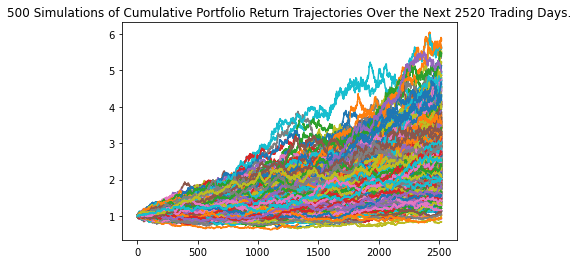

In [54]:
# Plot simulation outcomes
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

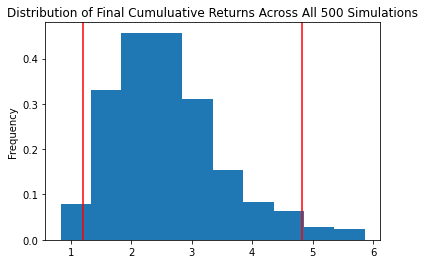

In [55]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.600087
std               0.917745
min               0.832094
25%               1.921909
50%               2.456265
75%               3.077052
max               5.864608
95% CI Lower      1.210900
95% CI Upper      4.827552
Name: 2520, dtype: float64


In [60]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000)
ci_upper_ten = round(tbl[9]*60000)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72654 and $289653
